## Spatial Data Science (GEO6119)

---

# Lab 6 (Part B): Kernel Density Map

In this lab, you will create kernel density maps from a GeoDataFrame, and test different parameters for the maps.


<br>
Instructor: Yi Qiang (qiangy@usf.edu)<br>

---

## 1. Install Libraries

We will need two new libraries [seaborn](https://seaborn.pydata.org/) and [plotly](https://plotly.com/python/) for this lab. Please do the following steps to install these two libarries.

1. Please open Anaconda Prompt, and use the command `conda activate geo` to activate the "geo" environment that you created in the previous lab. 

2. Install libpysal using the following command:

    `conda install -c conda-forge seaborn`
    
    If the above command doesn't work, please try the following one:
    
    `conda install -c anaconda seaborn`
    
    Click 'y' and then 'Enter' when asked to proceed.
    
3. Install contextily using the following command:

    `conda install -c plotly plotly`
    
4. Run the following code to import libpysal and other needed packages.

> **Tip**: You can always Google "anaconda install LIBRARY_NAME" to find the command to install a library. For example, the installation command of seaborn is in [this webpage](https://anaconda.org/anaconda/seaborn), which is the first page in the search result.

In [2]:
# Import all necessary packages
import seaborn as sns
import pandas as pd
import geopandas as gpd
import plotly as pl
import matplotlib.pyplot as plt

#set default plot size, you can adjust the [width, height] to make plots fit your screen size
plt.rcParams['figure.figsize'] = [10, 10]

## 2. Read and Explore the Dataset

Read the csv file `crime_oahu.csv` into a DataFrame `df`

You need to use pandas.read_csv to read the file into a DataFrame（not a GeoDataFrame).

In [3]:
# Read the file into a DataFrame
df = pd.read_csv('other/crime.csv')

# Preview the DataFrame
df.head()

Unnamed: 0             Time                 Location     Offence type  \
0           0  3/30/2018 23:56   911100 BLOCK RENTON RD  PROPERTY DAMAGE   
1           1  3/30/2018 23:55   0 BLOCK KANEOHE BAY DR              DUI   
2           2  3/30/2018 23:54   ALA WAI BLVD&LAUNIU ST            THEFT   
3           3  3/30/2018 23:52  2200 BLOCK KALAKAUA AVE            THEFT   
4           4  3/30/2018 23:44     2200 BLOCK N KING ST              DUI   

   Lattitude   Longitude  
0  21.340979 -158.036141  
1  21.422166 -157.748568  
2  21.283894 -157.828388  
3  21.280109 -157.829519  
4  21.335475 -157.880452

The column name "Lattitude" in df is a typo. We can use the `rename` function to change the column name to "Latitude".

In [4]:
#  Use rename to fix the typo
df = df.rename(columns={'Lattitude': 'Latitude'})

# Preview df to check if the typo is fixed
df.head()

Unnamed: 0             Time                 Location     Offence type  \
0           0  3/30/2018 23:56   911100 BLOCK RENTON RD  PROPERTY DAMAGE   
1           1  3/30/2018 23:55   0 BLOCK KANEOHE BAY DR              DUI   
2           2  3/30/2018 23:54   ALA WAI BLVD&LAUNIU ST            THEFT   
3           3  3/30/2018 23:52  2200 BLOCK KALAKAUA AVE            THEFT   
4           4  3/30/2018 23:44     2200 BLOCK N KING ST              DUI   

    Latitude   Longitude  
0  21.340979 -158.036141  
1  21.422166 -157.748568  
2  21.283894 -157.828388  
3  21.280109 -157.829519  
4  21.335475 -157.880452

In order to utilize geospatial functions in GeoPandas, we need to convert the DataFrame `df` to a GeoDataFrame `gdf`. The following code create point geometries using the Latitude and Longitude columns.

Note: we need to specify the coordinate system (EPSG:4326) of the GeoDataFrame using the `crs` parameter.

In [5]:
# Conver the df to a GeoDataFrame gdf
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude),crs = 4326)

# preview gdf to see the difference
gdf.head()

Unnamed: 0             Time                 Location     Offence type  \
0           0  3/30/2018 23:56   911100 BLOCK RENTON RD  PROPERTY DAMAGE   
1           1  3/30/2018 23:55   0 BLOCK KANEOHE BAY DR              DUI   
2           2  3/30/2018 23:54   ALA WAI BLVD&LAUNIU ST            THEFT   
3           3  3/30/2018 23:52  2200 BLOCK KALAKAUA AVE            THEFT   
4           4  3/30/2018 23:44     2200 BLOCK N KING ST              DUI   

    Latitude   Longitude                     geometry  
0  21.340979 -158.036141  POINT (-158.03614 21.34098)  
1  21.422166 -157.748568  POINT (-157.74857 21.42217)  
2  21.283894 -157.828388  POINT (-157.82839 21.28389)  
3  21.280109 -157.829519  POINT (-157.82952 21.28011)  
4  21.335475 -157.880452  POINT (-157.88045 21.33548)

## 3. Project the Points

The coordinates of the crime locations are in latitude and longitude, which are coordinates on the 3D earth surface. We need to project the points to a 2D space in projected coordinate system. 

Oahu is in the UTM 4N Zone. Next, we project the GeoDataFrame to UTM 4N Zone (EPSG:32604).

In [6]:
# Project gdf to EPSG:32604 and the update gdf
gdf = gdf.to_crs(32604)

# Preview gdf to check the projected coordinate
gdf.head()

Unnamed: 0             Time                 Location     Offence type  \
0           0  3/30/2018 23:56   911100 BLOCK RENTON RD  PROPERTY DAMAGE   
1           1  3/30/2018 23:55   0 BLOCK KANEOHE BAY DR              DUI   
2           2  3/30/2018 23:54   ALA WAI BLVD&LAUNIU ST            THEFT   
3           3  3/30/2018 23:52  2200 BLOCK KALAKAUA AVE            THEFT   
4           4  3/30/2018 23:44     2200 BLOCK N KING ST              DUI   

    Latitude   Longitude                        geometry  
0  21.340979 -158.036141  POINT (599946.951 2360191.424)  
1  21.422166 -157.748568  POINT (629698.250 2369388.464)  
2  21.283894 -157.828388  POINT (621538.835 2354018.600)  
3  21.280109 -157.829519  POINT (621424.594 2353598.721)  
4  21.335475 -157.880452  POINT (616096.750 2359689.064)

Now the map has been projected to UTM 4N Zone. You can see the coordinates in geometry become very large numbers, these are x and y coordiantes in meters in the UTM 4N Zone system.

After projection, we can plot the crime locations as points on top of a basemap. This map has two layers: 1) point locations and 2) basemap. So we do it in the following steps:

1. Create first create an empty axes (canvas) `ax1`. 1 in the parenthesis means we only create one subplot. 
2. Plot the point locations using `gdf.plot`, refer the `ax` paremter to the canvas `ax1`.
3. Use `contextily` to add a basemap to the canvas. Set the parameter `ax = ax1` to add the basemap to `ax1`.

In [7]:
gdf.crs

<Derived Projected CRS: EPSG:32604>
Name: WGS 84 / UTM zone 4N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 162°W and 156°W, northern hemisphere between equator and 84°N, onshore and offshore. United States (USA) - Alaska (AK).
- bounds: (-162.0, 0.0, -156.0, 84.0)
Coordinate Operation:
- name: UTM zone 4N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

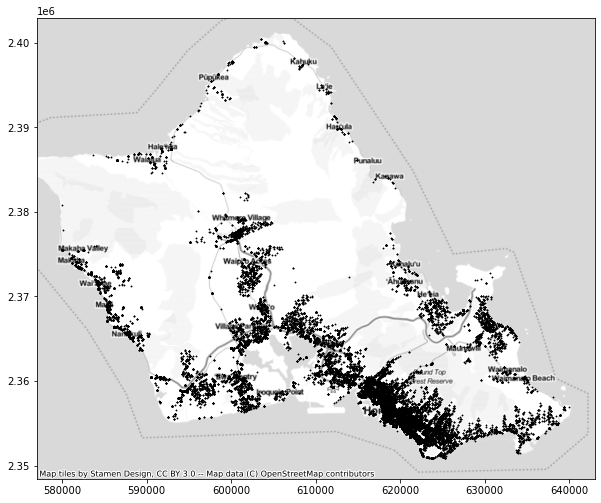

In [8]:
# import contextily
import contextily as cx

# 1. Create an empty axes (canvas) 'ax1'
ax1 = plt.subplot()

# 2. plot a choropleth map, and save map in a canvas "ax"
gdf.plot(marker='*', color='black', markersize=1, ax = ax1);

# 3. Adding a basemap (OpenStreetMap.Mapnik) to the canvas.
cx.add_basemap(source = cx.providers.Stamen.TonerLite, crs=gdf.crs, ax = ax1)

## 4. Select Burglary Incidents

First, we use `value_count` to check crimes in different types.

In [9]:
df['Offence type'].value_counts()

THEFT                 15027
UEMV                   6805
PROPERTY DAMAGE        4850
MOTOR VEH THEFT        3846
BURGLARY               3726
DUI                    2812
ASSAULT,SIMPLE         2722
DRUGS/NARCOTICS        1579
LIQUOR LAW             1466
FRAUD                  1172
THREATENING            1145
ROBBERY                 823
AGGRAVATED ASSAULT      671
LIC-PLATE THEFT         493
DISORDER CONDUCT        431
GRAFFITI                360
SEX ASSAULT             358
RAPE                    326
WEAPONS                 228
ARSON                   212
ROBBERY-VEH TAKEN        46
BURGLARY-VEH TAKEN        3
Name: Offence type, dtype: int64

Next, we can create a pie chart to show the proportion of crimes in different types. The procedure is similar to how you created a bar chart in [Lab2_B](https://github.com/qiang-yi/spatial_data_science/blob/main/Lab2_B_answer.ipynb).

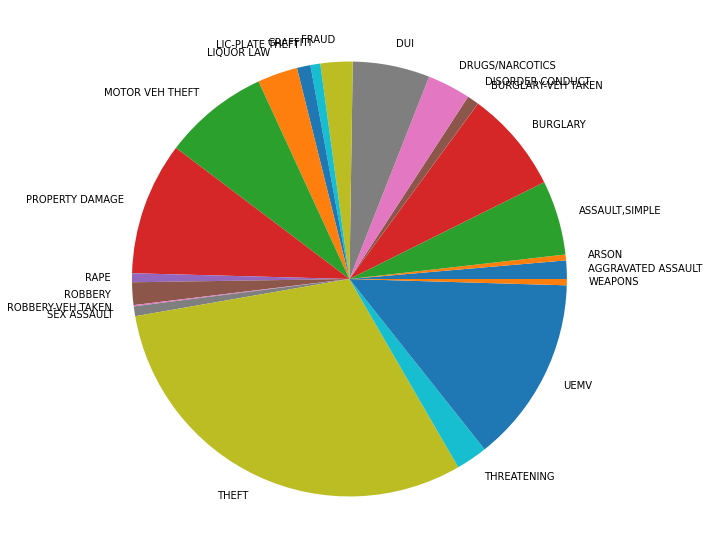

In [10]:
# Group the dataframe by the mothers' education levels
gdf_gr = gdf.groupby(["Offence type"]).count()

# Rename the column 'SEX'  to 'Num of children'. This is to create a meaningful legend in the plot
gdf_gr = gdf_gr.rename(columns={'Time':'Num of crimes'})

# Create a pie chart using the 'Num of children' as the y axis.
ax = gdf_gr.plot.pie(y='Num of crimes', legend = False, ylabel = "")

Select burglary incidents from `gdf` and store them in `bur`.

In [11]:
# Select BURGLARY incidents and store them in bur
bur = gdf[gdf["Offence type"] == 'BURGLARY']

# preview bur
bur.head()

Unnamed: 0             Time                    Location Offence type  \
13          13  3/30/2018 21:59        3300 BLOCK WINAM AVE     BURGLARY   
16          16  3/30/2018 21:09         3400 BLOCK UPPER ST     BURGLARY   
56          58  3/30/2018 12:49         2100 BLOCK 10TH AVE     BURGLARY   
59          61  3/30/2018 11:47  911000 BLOCK KEONEULA BLVD     BURGLARY   
82          84   3/30/2018 8:07        3300 BLOCK GEORGE ST     BURGLARY   

     Latitude   Longitude                        geometry  
13  21.278344 -157.811612  POINT (623283.884 2353417.217)  
16  21.275694 -157.808885  POINT (623569.038 2353126.032)  
56  21.298535 -157.792643  POINT (625234.818 2355667.210)  
59  21.320498 -158.022414  POINT (601384.498 2357933.147)  
82  21.273428 -157.810135  POINT (623441.268 2352874.255)

## 5. Create Kernel Density Map

First, we create histogram of bur in the x dimension. You can access x coordinates using `geometry.x`.

<AxesSubplot:>

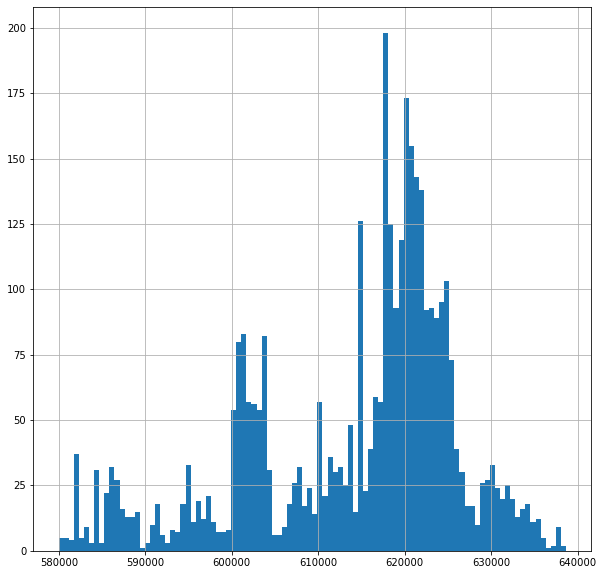

In [12]:
bur.geometry.x.hist(bins=100)

Next, create kernel density in the x axis. 

The kernel density shows a smoother distribution compared to the bins in the histogram. The bandwidth is automatically chosen.

<AxesSubplot:ylabel='Density'>

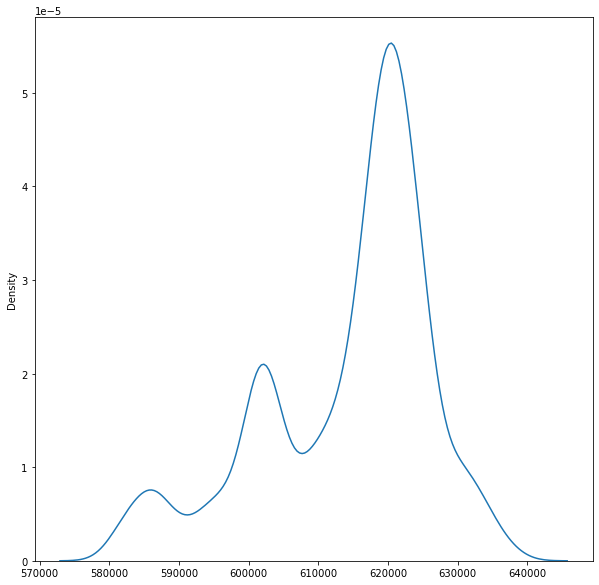

In [13]:
sns.kdeplot(x = bur.geometry.x)

You can use the `bw` parameter to change bandwidth. A larger `bw` creates a smoother density distribution.

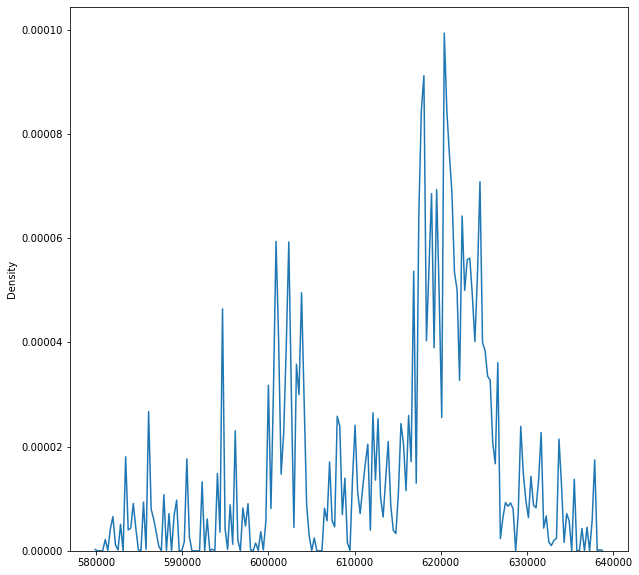

In [14]:
ax = sns.kdeplot(x = bur['geometry'].x, bw_adjust= 0.01)

Create kernel density in 2 dimensions (x and y). The basic map only shows contours. Next, we will add parameters to make the map look better.

<AxesSubplot:>

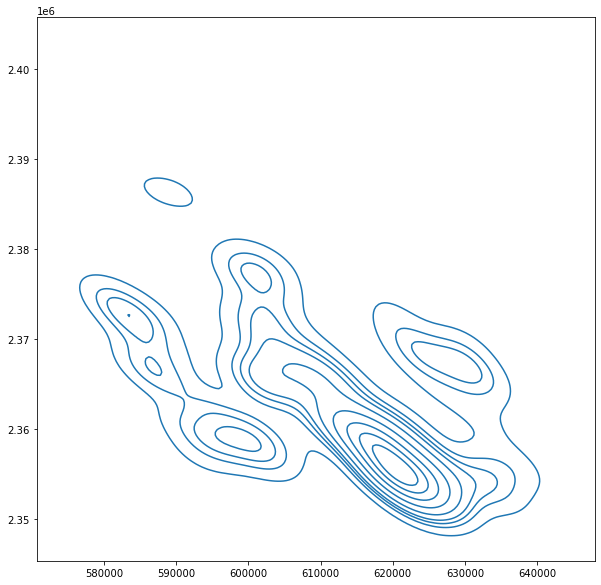

In [15]:
sns.kdeplot(x = bur.geometry.x, y = bur.geometry.y)

First, we add color shades in the yellow-orange-red color map.

<AxesSubplot:>

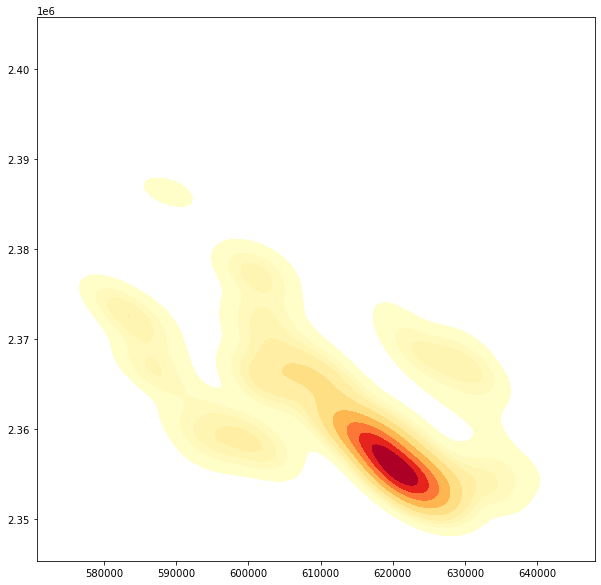

In [16]:
sns.kdeplot(x = bur.geometry.x, y = bur.geometry.y, fill = True,  cmap = 'YlOrRd')

If you want a continuous color transition, you can increase the number of color levels `n_levels`.

<AxesSubplot:>

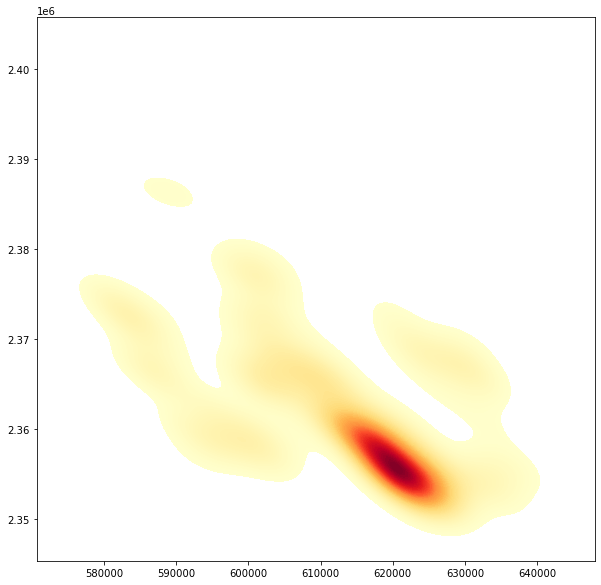

In [17]:
sns.kdeplot(x = bur.geometry.x, y = bur.geometry.y, n_levels=100, fill = True,  cmap = 'YlOrRd')

Remove the color of the lowest color level by setting the display threshold to 0.05 (`thresh = 0.05`). Adjust the bandwidth to 0.2. 

<AxesSubplot:>

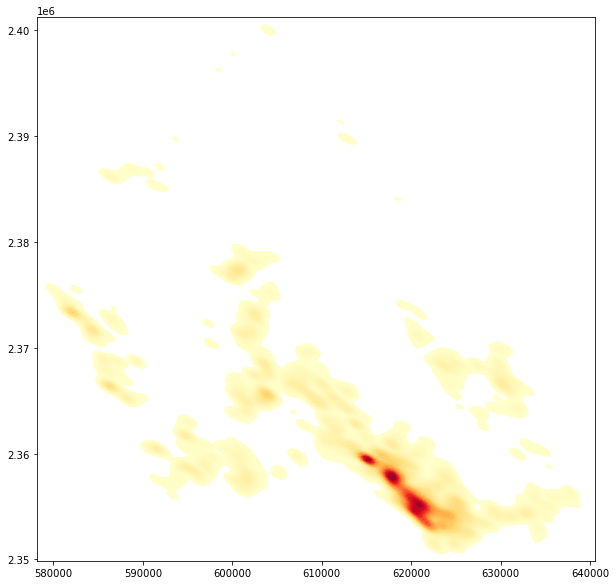

In [18]:
sns.kdeplot(x = bur.geometry.x, y = bur.geometry.y, n_levels=50, fill = True, thresh = 0.05,  cmap = 'YlOrRd', bw_adjust= 0.2)

A basemap can associate the density patterns with specific places. Now, we add a basemap beneath the kernel density. Also, we adjust `alpha` to 0.4 to make the kernel density layer semi-transparent (alpha = 0 is totally transparent).

As we did in the previous map, we first create an empty canvas `ax1`, and then add kernel density and the basemap to the `ax1` by setting the parameter `ax = ax1`.

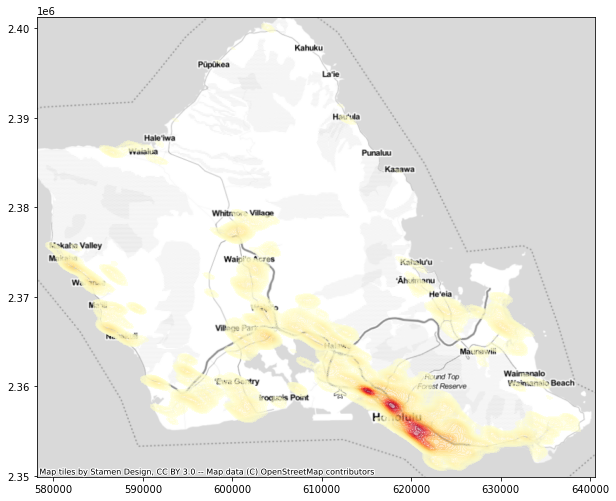

In [19]:
# Create an empty canvas 'ax1'
ax1 = plt.subplot()

# Create a kernel density map and add the map in a canvas 'ax1'.
sns.kdeplot(x = bur.geometry.x, y = bur.geometry.y, n_levels=50, 
            fill = True, thresh = 0.05,  
            cmap = 'YlOrRd', bw_adjust= 0.2, alpha=0.4, ax = ax1)

# Adding a basemap (OpenStreetMap.Mapnik) to the canvas 'ax1'.
cx.add_basemap(source = cx.providers.Stamen.TonerLite, crs=gdf.crs, ax = ax1)

### Question 1 (2pts): please create a kernel density map for DUI. You need to use an appropriate color map, bandwidth, and transparency (alpha) and a basemap.

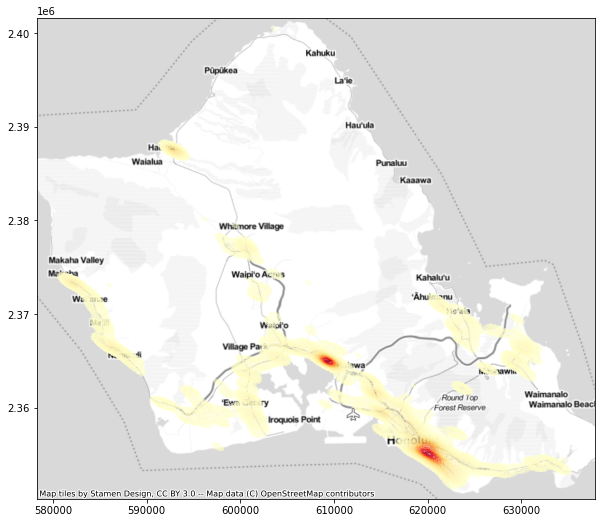

In [20]:
# Create an empty canvas 'ax1'
ax1 = plt.subplot()

# Select rows where 'Offence type' is 'DUI' and store the selected rows in a GeoDataFrame`dui`
dui = gdf[gdf["Offence type"] == 'DUI']

# Create a kernel density map for 'dui' and store the map in a canvas 'ax'.
sns.kdeplot(x = dui.geometry.x, y = dui.geometry.y, n_levels=50, 
            fill = True, thresh = 0.05,  
            cmap = 'YlOrRd', bw_adjust= 0.2, alpha=0.5, ax = ax1)

# Adding a basemap (OpenStreetMap.Mapnik) to the canvas 'ax'.
cx.add_basemap(source = cx.providers.Stamen.TonerLite, crs=gdf.crs, ax = ax1)

### Question 2 (1.5pts): Add point locations to the kernel density map of DUI created in Question 1.

Requirement: 
1. Add point locations of DUI on top of the kernel density map. Use 0.1 as the markersize of the points

2. Use contextily to add a basemap to the map. The map should be similar to the following.
<img src="https://raw.githubusercontent.com/qiang-yi/spatial_data_science/main/image/wk6/q2.jpg" width="600">

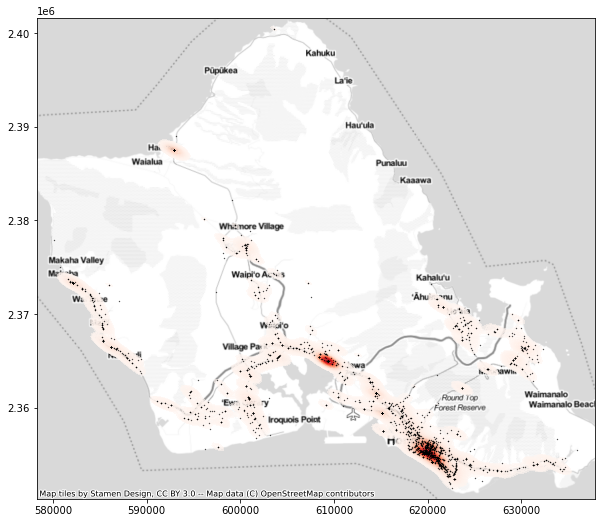

In [21]:
#Create an empty canvas
ax1 = plt.subplot()

# plot kernel density of DUI points as the first layer
sns.kdeplot(x = dui.geometry.x, y = dui.geometry.y, n_levels=50, 
            fill = True, thresh = 0.05,  
            cmap = 'Reds', bw_adjust= 0.2, alpha=0.6, ax = ax1)

# plot the point locations to the canvas
dui.plot(ax=ax1,color = 'black', markersize = 0.1)

# Adding a basemap (OpenStreetMap.Mapnik) to the canvas 'ax'.
cx.add_basemap(source = cx.providers.Stamen.TonerLite, crs=gdf.crs, ax = ax1)

In addition to the methods introduced above, you can also use the [Plotly](https://plotly.com/python/maps/) library to create various types of maps in an interactive map frame. 

### Question 3 (1.5pt): Please refer to [this tutorial](https://plotly.com/python/mapbox-density-heatmaps/) to create a interactive density map for DUI locations.

Tips:

- You should use the 'Latitude' and 'Longitude' columns as `lat` and `lon` parameters.
- Remove `z`, `center`, and `zoom` parameters. 
- `radius` controls the bandwidth of kernel density. You can adjust the value between 1 and 100 and choose an appropriate value. 
- In addition to `stamen-terrain`, you are free to try other mapbox styles for the basemap, such as `open-street-map`, `carto-positron`, `carto-darkmatter`, `stamen-toner` or `stamen-watercolor`.

In [22]:
import plotly.express as px
fig = px.density_mapbox(dui, lat="Latitude", lon="Longitude", radius=5,
                        mapbox_style="stamen-terrain")
fig.show()